# **Importing Necessary Libraries**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [2]:
df = pd.read_csv("cookie_train.csv")
df.head()

,Id,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical,Defective
0,59,120,0.05,1.2,80,20,40,2.0,0.5,0.10,6.0,0.5,1.0,10,5,Ethyl butyrate,0
1,60,150,0.08,1.4,85,23,43,3.0,0.6,0.20,5.5,0.6,0.9,12,6,Limonene,1
2,61,135,0.06,1.3,82,22,42,2.5,0.3,0.30,6.2,0.4,0.8,8,4,?-Pinene,0
3,62,100,0.02,1.0,75,18,38,1.5,0.2,0.05,7.0,0.7,0.7,7,3,Linalool,1
4,63,145,0.07,1.5,87,25,45,3.5,0.8,0.15,5.8,0.5,0.9,13,7,?-Caryophyllene,1


In [3]:
df.shape

(30, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       30 non-null     int64  
 1   Texture Hardness         30 non-null     int64  
 2   Texture Chewiness        30 non-null     float64
 3   Texture Crispiness       30 non-null     float64
 4   Color L*                 30 non-null     int64  
 5   Color a*                 30 non-null     int64  
 6   Color b*                 30 non-null     int64  
 7   Taste Sweetness          30 non-null     float64
 8   Taste Saltiness          30 non-null     float64
 9   Taste Bitterness         30 non-null     float64
 10  Shape Diameter           30 non-null     float64
 11  Shape Thickness          30 non-null     float64
 12  Smell Intensity          30 non-null     float64
 13  Smell Complexity         30 non-null     int64  
 14  Smell Specific Compound  30 

In [5]:
df["Detected Chemical"].value_counts()

?-Pinene           4
Limonene           3
?-Terpinene        2
Linalool           2
?-Caryophyllene    2
Geraniol           2
?-Myrcene          2
Eucalyptol         1
?-Terpineol        1
Eugenol            1
Citral             1
Camphor            1
Nerol              1
Ethyl butyrate     1
Citronellal        1
?-Phellandrene     1
2-Nonanone         1
1-Octen-3-ol       1
3-Carene           1
Thymol             1
Name: Detected Chemical, dtype: int64

# **Checking for NULL Values**

---



In [6]:
df.isnull().sum()

Id                         0
Texture Hardness           0
Texture Chewiness          0
Texture Crispiness         0
Color L*                   0
Color a*                   0
Color b*                   0
Taste Sweetness            0
Taste Saltiness            0
Taste Bitterness           0
Shape Diameter             0
Shape Thickness            0
Smell Intensity            0
Smell Complexity           0
Smell Specific Compound    0
Detected Chemical          0
Defective                  0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='Texture Hardness', ylabel='Texture Crispiness'>

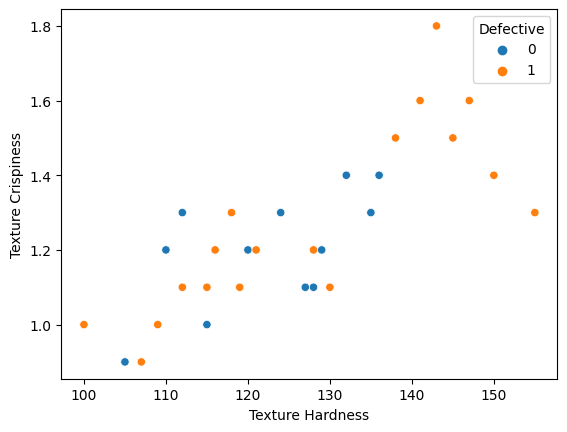

In [7]:
sns.scatterplot(x="Texture Hardness", y="Texture Crispiness", data=df, hue="Defective")

<Axes: xlabel='Texture Hardness', ylabel='Texture Chewiness'>

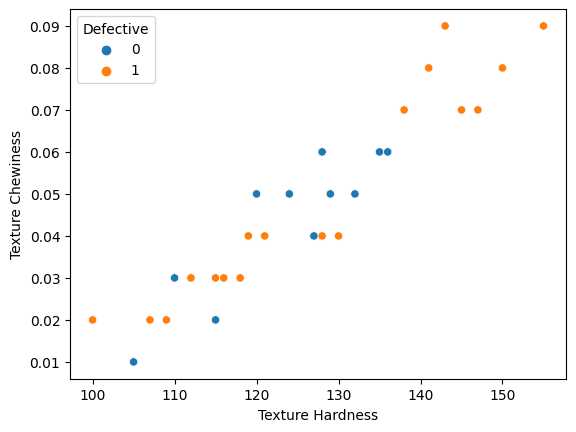

In [8]:
sns.scatterplot(x="Texture Hardness", y="Texture Chewiness", data=df, hue="Defective")

<Axes: xlabel='Defective', ylabel='count'>

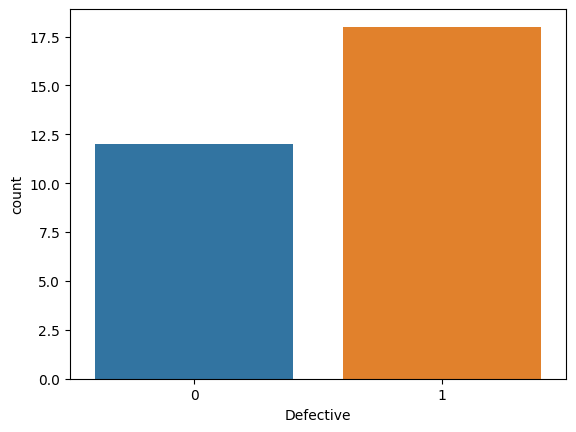

In [9]:
sns.countplot(x="Defective", data=df)

<Axes: xlabel='Detected Chemical', ylabel='count'>

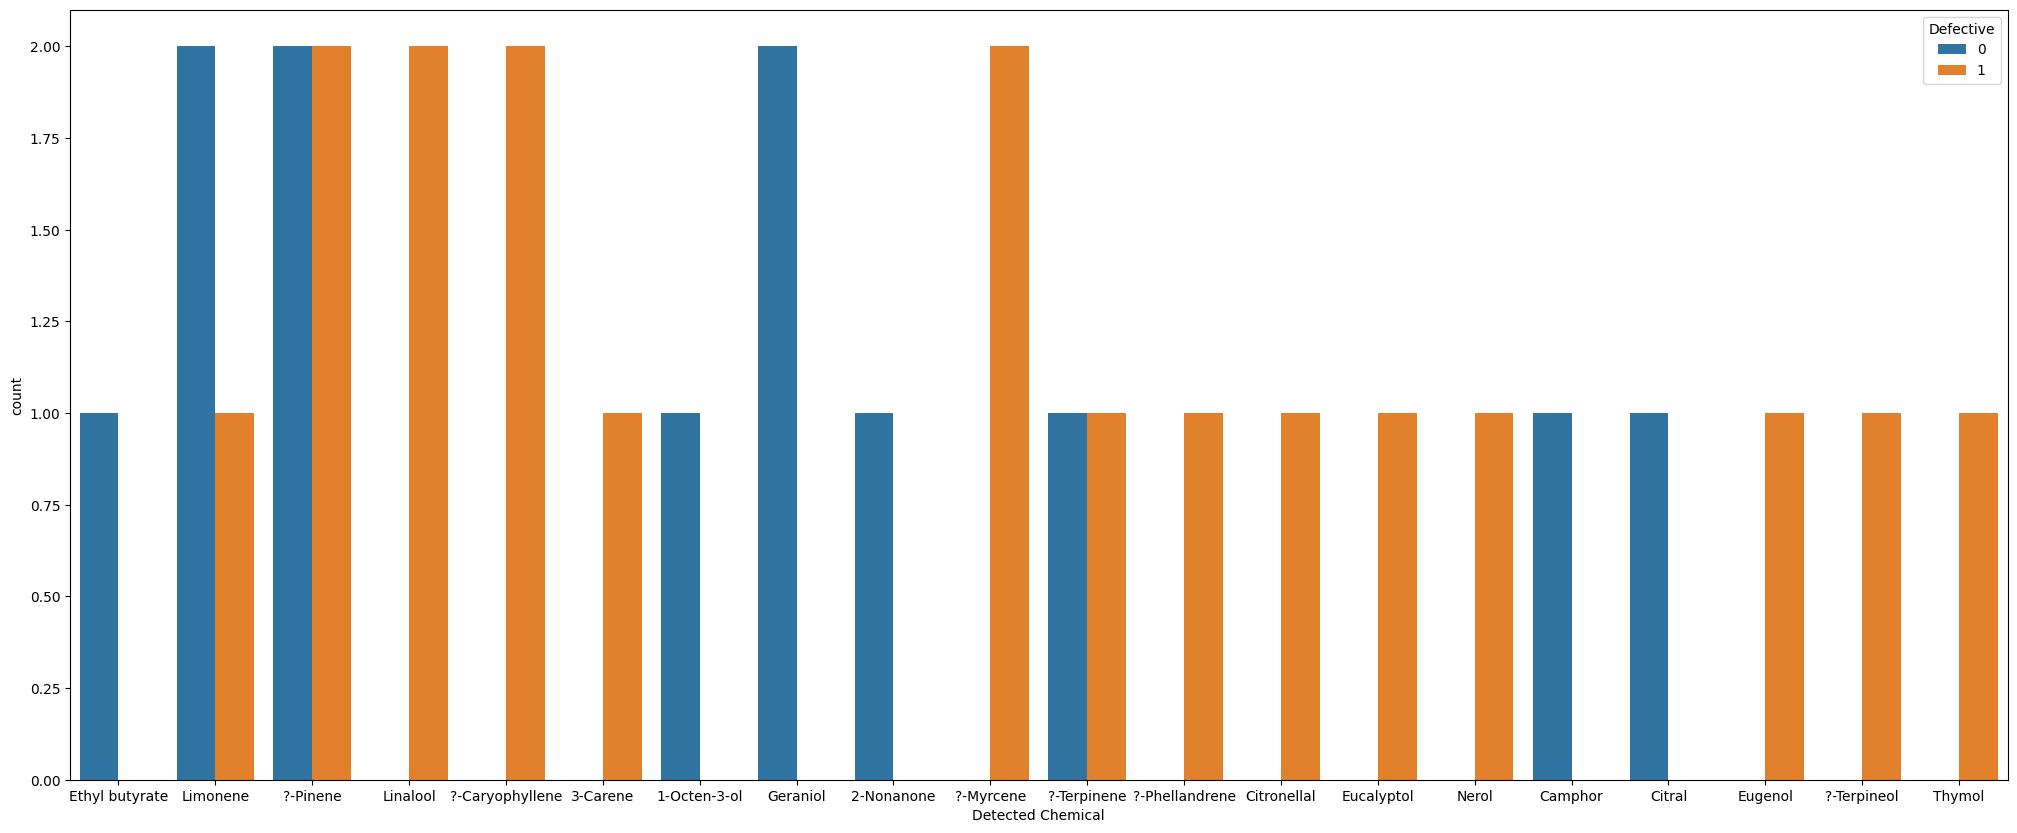

In [10]:
plt.figure(figsize=(25,10))
sns.countplot(x="Detected Chemical", data=df, hue="Defective")

<Axes: xlabel='Color a*', ylabel='Color b*'>

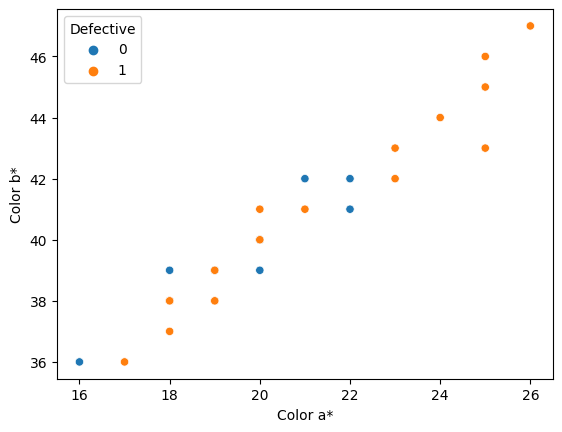

In [11]:
sns.scatterplot(x="Color a*", y="Color b*", data=df, hue="Defective")

<Axes: >

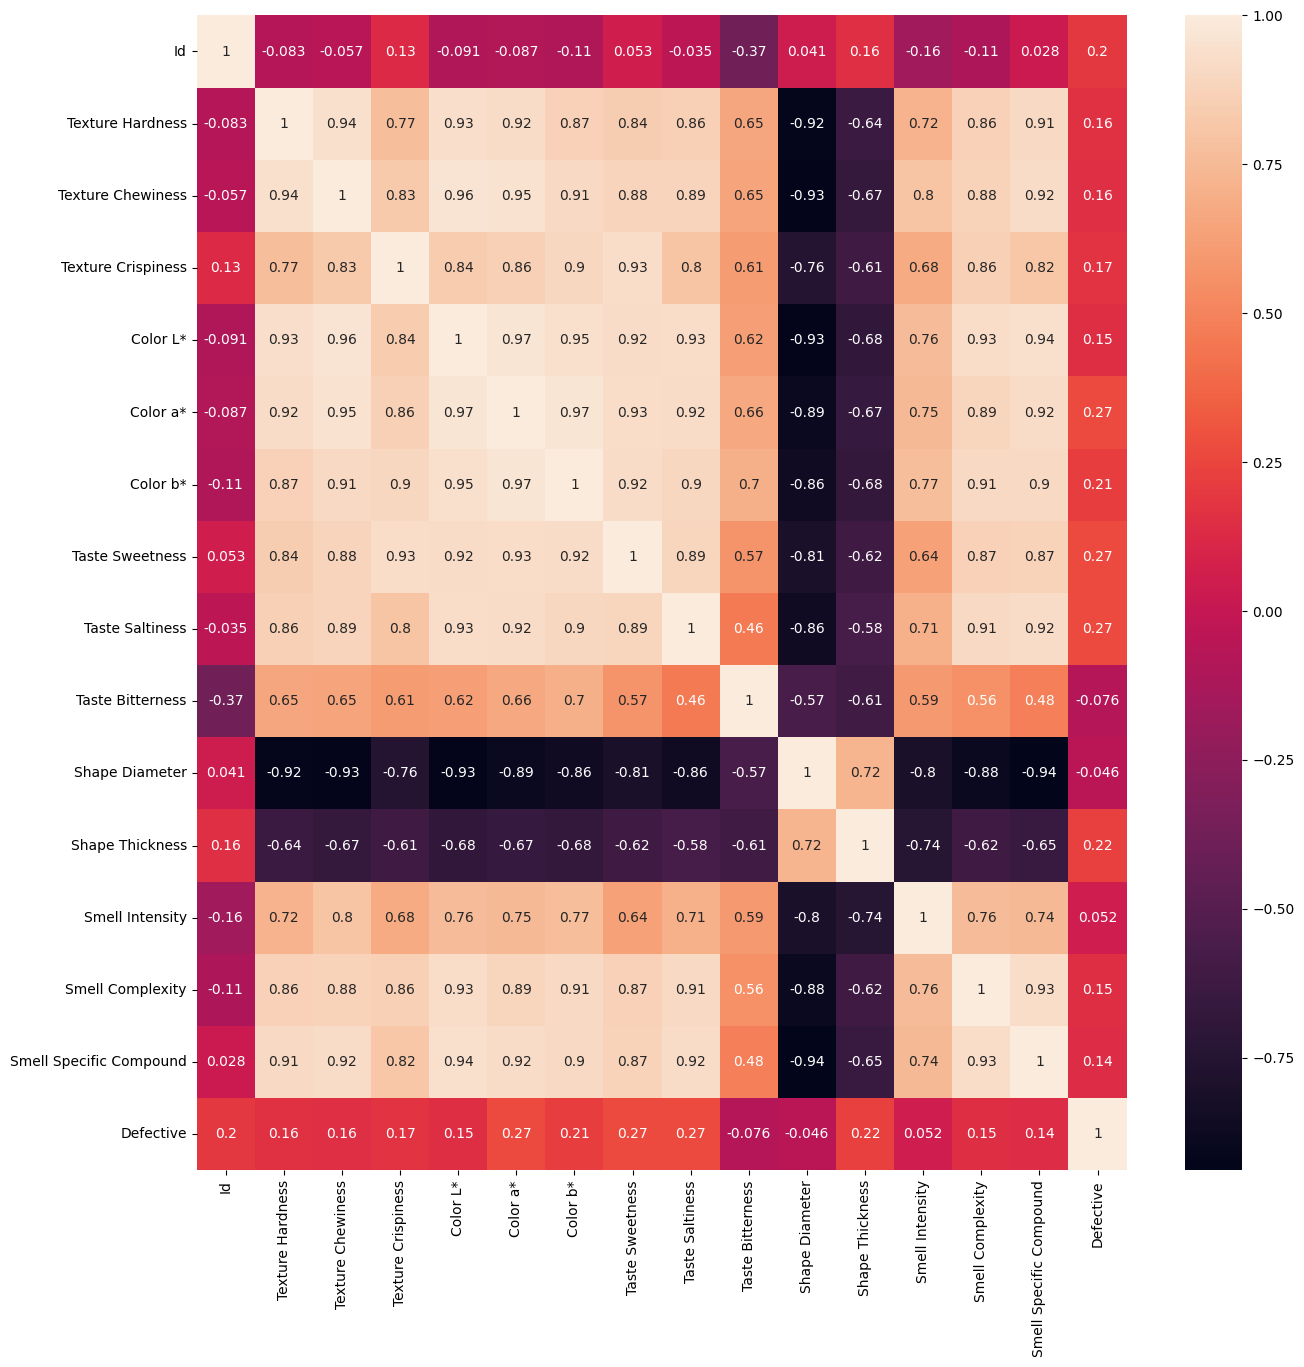

In [12]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

# **Seperating Dependent & Independent Variables**

---



In [13]:
X = df.drop(["Id", "Defective"], axis=1)
y = df["Defective"]

In [14]:
X.head()

,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical
0,120,0.05,1.2,80,20,40,2.0,0.5,0.10,6.0,0.5,1.0,10,5,Ethyl butyrate
1,150,0.08,1.4,85,23,43,3.0,0.6,0.20,5.5,0.6,0.9,12,6,Limonene
2,135,0.06,1.3,82,22,42,2.5,0.3,0.30,6.2,0.4,0.8,8,4,?-Pinene
3,100,0.02,1.0,75,18,38,1.5,0.2,0.05,7.0,0.7,0.7,7,3,Linalool
4,145,0.07,1.5,87,25,45,3.5,0.8,0.15,5.8,0.5,0.9,13,7,?-Caryophyllene


In [15]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Defective, dtype: int64

# **Encoding**

---



In [16]:
from sklearn.preprocessing import LabelEncoder
chem_le = LabelEncoder()

In [17]:
X["Detected Chemical"] = chem_le.fit_transform(X["Detected Chemical"])

# **Splitting into Training & Testing Set**

---



In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 15)
(6, 15)
(24,)
(6,)


# **Model Building - XGB Classifier**

---



In [21]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
xgbc_params = {'gamma' :[i/10.0 for i in range(0,5)],
               'max_depth' : [2,4,6,8,10,12,13,15],
               'min_child_weight':[1,2,5,10],
               'max_delta_step':[0,1,2,5,10],
               'subsample' :[i/10.0 for i in range(5,10)],
               'colsample_bytree' :[i/10.0 for i in range(5,10)],
               'colsample_bylevel' :[i/10.0 for i in range(5,10)],
               'n_estimators' : [100,150,200,300]
               }

In [24]:
xgbc_cv = RandomizedSearchCV(estimator=xgbc_model,
                            param_distributions=xgbc_params,
                            cv=10)

In [81]:
xgbc_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [82]:
xgbc_cv.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 13,
 'max_delta_step': 0,
 'gamma': 0.3,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.7}

In [27]:
xgbc_cv.best_score_

0.7

In [73]:
xgbc_model = XGBClassifier( subsample = 0.8,
                           n_estimators = 300,
                            min_child_weight = 1,
                            max_depth = 8,
                            max_delta_step = 0,
                            gamma = 0.0,
                            colsample_bytree = 0.5,
                            colsample_bylevel = 0.8
                            )

In [ ]:
xgbc_model = XGBClassifier( subsample = 0.7,
                           n_estimators = 300,
                            min_child_weight = 1,
                            max_depth = 4,
                            max_delta_step = 0,
                            gamma = 0.3,
                            colsample_bytree = 0.7,
                            colsample_bylevel = 0.9
                            )

In [74]:
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=8, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [75]:
xgbc_model.score(X_test, y_test)

0.3333333333333333

# **Model Building - Random Forest Classifier**

---



In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
rfc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [34]:
rfc_cv = RandomizedSearchCV(estimator=rfc_model,
                            param_distributions=rfc_params,
                            cv=10)

In [35]:
rfc_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [36]:
rfc_cv.best_params_

{'max_features': 7, 'max_depth': 10}

In [37]:
rfc_cv.best_score_

0.7166666666666666

In [66]:
rfc_model = RandomForestClassifier(
    max_features=7, max_depth=10
)

In [67]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=7)

In [68]:
rfc_model.score(X_test, y_test)

0.6666666666666666

# **Model Building - Decision Tree Classifier**

---



In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
dtc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [86]:
dtc_cv = RandomizedSearchCV(estimator=dtc_model,
                            param_distributions=dtc_params,
                            cv=10)

In [87]:
dtc_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [88]:
dtc_cv.best_params_

{'max_features': 9, 'max_depth': 11}

In [89]:
dtc_cv.best_score_

0.7333333333333333

In [90]:
dtc_model = DecisionTreeClassifier(max_features=9, max_depth=11)

In [91]:
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_features=9)

In [92]:
dtc_model.score(X_test, y_test)

0.6666666666666666

# **Model Building - Logistic Regression**

---



In [99]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [103]:
X_scaled = pd.DataFrame(ms.fit_transform(X), columns = X.columns)

In [104]:
X_scaled.head()

,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical
0,0.363636,0.500,0.333333,0.4375,0.4,0.363636,0.333333,0.500,0.285714,0.294118,0.2,1.000000,0.625,0.50,0.631579
1,0.909091,0.875,0.555556,0.7500,0.7,0.636364,0.666667,0.625,0.642857,0.000000,0.4,0.833333,0.875,0.75,0.842105
2,0.636364,0.625,0.444444,0.5625,0.6,0.545455,0.500000,0.250,1.000000,0.411765,0.0,0.666667,0.375,0.25,0.315789
3,0.000000,0.125,0.111111,0.1250,0.2,0.181818,0.166667,0.125,0.107143,0.882353,0.6,0.500000,0.250,0.00,0.894737
4,0.818182,0.750,0.666667,0.8750,0.9,0.818182,0.833333,0.875,0.464286,0.176471,0.2,0.833333,1.000,1.00,0.157895


In [97]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [105]:
lr_model.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Testing Data**

---



In [41]:
test_df = pd.read_csv("cookie_test.csv")
test_df.head()

,Id,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical,Defective
0,22,132,0.07,1.5,84,24,45,3.1,0.6,0.08,5.7,0.5,0.8,9,6,2-Heptanone,NaN
1,23,125,0.04,1.1,77,20,39,2.4,0.4,0.03,6.2,0.6,0.7,8,5,Butyric acid,NaN
2,24,138,0.08,1.8,87,26,47,4.0,0.7,0.15,5.4,0.4,1.0,11,8,Linalool,NaN
3,25,120,0.03,0.9,72,17,35,1.7,0.3,0.01,6.5,0.7,0.5,7,4,p-Cymene,NaN
4,26,147,0.10,2.0,92,31,51,4.5,0.9,0.25,5.1,0.3,1.1,13,9,Benzaldehyde,NaN


In [42]:
test_df.isnull().sum()

Id                          0
Texture Hardness            0
Texture Chewiness           0
Texture Crispiness          0
Color L*                    0
Color a*                    0
Color b*                    0
Taste Sweetness             0
Taste Saltiness             0
Taste Bitterness            0
Shape Diameter              0
Shape Thickness             0
Smell Intensity             0
Smell Complexity            0
Smell Specific Compound     0
Detected Chemical           0
Defective                  58
dtype: int64

In [43]:
X_subs = test_df.drop(["Id", "Defective"], axis=1)

In [44]:
X_subs.head()

,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical
0,132,0.07,1.5,84,24,45,3.1,0.6,0.08,5.7,0.5,0.8,9,6,2-Heptanone
1,125,0.04,1.1,77,20,39,2.4,0.4,0.03,6.2,0.6,0.7,8,5,Butyric acid
2,138,0.08,1.8,87,26,47,4.0,0.7,0.15,5.4,0.4,1.0,11,8,Linalool
3,120,0.03,0.9,72,17,35,1.7,0.3,0.01,6.5,0.7,0.5,7,4,p-Cymene
4,147,0.10,2.0,92,31,51,4.5,0.9,0.25,5.1,0.3,1.1,13,9,Benzaldehyde


In [45]:
X_subs["Detected Chemical"] = chem_le.fit_transform(X_subs["Detected Chemical"])

In [46]:
X_subs.head()

,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical
0,132,0.07,1.5,84,24,45,3.1,0.6,0.08,5.7,0.5,0.8,9,6,0
1,125,0.04,1.1,77,20,39,2.4,0.4,0.03,6.2,0.6,0.7,8,5,7
2,138,0.08,1.8,87,26,47,4.0,0.7,0.15,5.4,0.4,1.0,11,8,19
3,120,0.03,0.9,72,17,35,1.7,0.3,0.01,6.5,0.7,0.5,7,4,35
4,147,0.10,2.0,92,31,51,4.5,0.9,0.25,5.1,0.3,1.1,13,9,6


# **Submission File-1**

---



In [76]:
y_preds1 = xgbc_model.predict(X_subs)

In [77]:
subs1_df = pd.DataFrame({
    "Id": test_df["Id"],
    "Category": y_preds1
})

In [78]:
subs1_df.head()

,Id,Category
0,22,1
1,23,1
2,24,1
3,25,0
4,26,1


In [80]:
subs1_df.to_csv("submission1.csv", index=False)

# **Submission File - 2**

---



In [69]:
y_preds2 = rfc_model.predict(X_subs)

In [70]:
subs2_df = pd.DataFrame({
    "Id": test_df["Id"],
    "Category": y_preds2
})

In [71]:
subs2_df.head()

,Id,Category
0,22,1
1,23,1
2,24,1
3,25,0
4,26,1


In [72]:
subs2_df.to_csv("submission2.csv", index=False)

# **Submission FIle - 3**

---



In [93]:
y_preds3 = dtc_model.predict(X_subs)

In [94]:
subs3_df = pd.DataFrame({
    "Id": test_df["Id"],
    "Category": y_preds3
})

In [95]:
subs3_df.head()

,Id,Category
0,22,1
1,23,1
2,24,1
3,25,0
4,26,1


In [96]:
subs3_df.to_csv("submission3.csv", index=False)

# **Submission File - 4**

---



In [106]:
X_subs_scaled = pd.DataFrame(ms.transform(X_subs), columns = X_subs.columns)

In [107]:
X_subs_scaled.head()

,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical
0,0.581818,0.750,0.666667,0.6875,0.8,0.818182,0.700000,0.625,0.214286,0.117647,0.2,0.666667,0.500,0.75,0.000000
1,0.454545,0.375,0.222222,0.2500,0.4,0.272727,0.466667,0.375,0.035714,0.411765,0.4,0.500000,0.375,0.50,0.368421
2,0.690909,0.875,1.000000,0.8750,1.0,1.000000,1.000000,0.750,0.464286,-0.058824,0.0,1.000000,0.750,1.25,1.000000
3,0.363636,0.250,0.000000,-0.0625,0.1,-0.090909,0.233333,0.250,-0.035714,0.588235,0.6,0.166667,0.250,0.25,1.842105
4,0.854545,1.125,1.222222,1.1875,1.5,1.363636,1.166667,1.000,0.821429,-0.235294,-0.2,1.166667,1.000,1.50,0.315789


In [108]:
y_preds4 = lr_model.predict(X_subs_scaled)

In [109]:
subs4_df = pd.DataFrame({
    "Id": test_df["Id"],
    "Category": y_preds4
})

In [110]:
subs4_df.head()

,Id,Category
0,22,1
1,23,1
2,24,1
3,25,1
4,26,1


In [111]:
subs4_df.to_csv("submission4.csv", index=False)